# MKT Cycle ML Prediction

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle
%run fmml
%run fmplot

# Import ML Data Frame

In [69]:
# %run finmktml
# Read ML data Frame

filename='./data/df_ml_2020115_195013_to_2020114.csv'
dfMLXY = pd.read_csv(filename,index_col=0,parse_dates=True)
print(dfMLXY.shape)


dfMLXY.drop('T10Y3M',axis=1,inplace=True)  # data starts at 1955-1-1

dfMLXY=dfMLXY.loc[dataStartDate:]
print(dfMLXY.columns.values)
display(dfMLXY.head(3))


(18144, 52)
['Close' 'High' 'Low' 'Open' 'Volume' 'mkt' 'mcupm' 'mcnr' 'mucdown'
 'mdcup' 'PE' 'PE_mom' 'Earnings' 'Earnings_mom' 'GDP' 'gdp_qoq'
 'recession1q' 'recession2q' 'UNRATE' 'unrate_pchange' 'CPIAUCSL' 'cpimom'
 'UMCSENT' 'umcsent_pchange' 'Close_nma1' 'Volume_nma1' 'Close_nma5'
 'Volume_nma5' 'Close_nma10' 'Volume_nma10' 'Close_nma15' 'Volume_nma15'
 'Close_nma20' 'Volume_nma20' 'Close_nma30' 'Volume_nma30' 'Close_nma50'
 'Volume_nma50' 'Close_nma200' 'Volume_nma200' 'rma_sma50_sma200'
 'rma_sma20_sma50' 'PDI50' 'NDI50' 'ADX' 'Close_lrstd25' 'Close_lrstd63'
 'Close_lrstd126' 'Close_lrstd25_avgvel5' 'Close_lrstd63_avgvel5'
 'Close_lrstd126_avgvel5']


,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,...,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5
Date,,,,,,,,,,,,,,,,,,,,,
1955-01-01,35.980000,35.980000,35.980000,35.980000,3840000.0,1.0,1.0,1.159664,0.00000,0.0,...,0.035326,67.846367,32.153633,31.135684,0.008795,0.007370,0.006617,-0.000031,0.000007,-0.000019
1955-01-03,36.750000,36.750000,36.750000,36.750000,4570000.0,1.0,1.0,1.205882,0.00000,0.0,...,0.035439,72.144500,27.855500,31.651500,0.009610,0.007754,0.006846,0.000103,0.000068,0.000019
1955-01-04,36.419998,36.419998,36.419998,36.419998,4420000.0,1.0,1.0,1.186074,0.00898,0.0,...,0.035034,68.084748,31.915252,31.828676,0.009625,0.007867,0.006910,0.000089,0.000081,0.000035


### Nulls

In [67]:
%run fmml

# UMCSENT starts in 1953 2 -1 ... set the start date to 1955-1-1
# GDP starts 1950
# Yield Curve Starts in 1982,1,4
# UNRATE starts in 1950
# CPI start in 1950
    
dfMLXY=dfMLXY.loc[dataStartDate:]

print('dfMLXY.shaape =',dfMLXY.shape)
nullrows=len([True for idx,row in dfMLXY.iterrows() if any(row.isnull())])
print("null_rows = ",nullrows)

display(dfMLXY[dfMLXY.isna().any(axis=1)])

dfMLXY.shaape = (16872, 51)
null_rows =  0


,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,...,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5
Date,,,,,,,,,,,,,,,,,,,,,


# ML Data Preprocessing

### X and Y

In [237]:

# Y Dataframe
dfY=pd.DataFrame(dfMLXY['mkt'])
dfY.rename(columns={'mkt':'y'},inplace=True)
dfY['y']=(dfY['y']+1)/2
print(dfY.shape)


# X Dataframe

dfX = dfMLXY.drop(['Close','High','Low','Open','Volume','mkt','mcnr','Earnings','GDP'],axis=1)
x_columns=dfX.columns
#  .... these seem to make the performance worse for now, try after PCA

SScaler=StandardScaler()
X=SScaler.fit_transform(dfX)    
dfX=pd.DataFrame(data=X, columns=dfX.columns, index=dfX.index)
print(dfX.shape)

dfX.head(3)

%run fmml
NshiftFeatures = [(1 , ['mcupm','mucdown','mdcup', 'CPIAUCSL', 'cpimom','UMCSENT','umcsent_pchange',
                 'UNRATE','unrate_pchange','recession1q','recession2q','PE','PE_mom','gdp_qoq',
                'Close_nma1','Volume_nma1']),
                (3, ['Close_nma5','Volume_nma5'] ),
                (5,['Close_nma10','Volume_nma10']),
                (7,['Close_nma15','Volume_nma15']),
                (10,['Close_nma20','Volume_nma20']),
                (15,['Close_nma30','Volume_nma30']),
                (20,['Close_lrstd25','Close_lrstd25_avgvel5']),
                (25,['Close_nma50','Volume_nma50','NDI50','PDI50','ADX','rma_sma20_sma50']), 
                (50,['Close_lrstd63','Close_lrstd63_avgvel5']),
                (100,['Close_lrstd126' , 'Close_nma200','rma_sma50_sma200','Volume_nma200','Close_lrstd126_avgvel5'])
                ]

dfXaligned,dfYaligned = mlalign(dfX,dfY,NshiftFeatures)

dfXaligned.head(3)

(16872, 1)
(16872, 42)
1 ['mcupm', 'mucdown', 'mdcup', 'CPIAUCSL', 'cpimom', 'UMCSENT', 'umcsent_pchange', 'UNRATE', 'unrate_pchange', 'recession1q', 'recession2q', 'PE', 'PE_mom', 'gdp_qoq', 'Close_nma1', 'Volume_nma1']
3 ['Close_nma5', 'Volume_nma5']
5 ['Close_nma10', 'Volume_nma10']
7 ['Close_nma15', 'Volume_nma15']
10 ['Close_nma20', 'Volume_nma20']
15 ['Close_nma30', 'Volume_nma30']
20 ['Close_lrstd25', 'Close_lrstd25_avgvel5']
25 ['Close_nma50', 'Volume_nma50', 'NDI50', 'PDI50', 'ADX', 'rma_sma20_sma50']
50 ['Close_lrstd63', 'Close_lrstd63_avgvel5']
100 ['Close_lrstd126', 'Close_nma200', 'rma_sma50_sma200', 'Volume_nma200', 'Close_lrstd126_avgvel5']
NshiftMax = 100
X Features =  ['mcupm_n0', 'mucdown_n0', 'mdcup_n0', 'CPIAUCSL_n0', 'cpimom_n0', 'UMCSENT_n0', 'umcsent_pchange_n0', 'UNRATE_n0', 'unrate_pchange_n0', 'recession1q_n0', 'recession2q_n0', 'PE_n0', 'PE_mom_n0', 'gdp_qoq_n0', 'Close_nma1_n0', 'Volume_nma1_n0', 'Close_nma5_n2', 'Volume_nma5_n2', 'Close_nma10_n4', 'Volume_n

,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,cpimom_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,...,PDI50_n24,ADX_n24,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd63_avgvel5_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99,Close_lrstd126_avgvel5_n99
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-02,0.310775,0.940289,-0.246449,1.787468,-0.275563,-0.575393,1.475012,1.185152,-0.69285,-0.227607,...,-0.275679,-0.546931,-0.149761,0.722451,-0.211633,4.405851,0.283493,-0.894420,-0.056219,1.151949
2020-11-03,0.310775,0.544399,-0.246449,1.787468,-0.275563,-0.575393,1.475012,1.185152,-0.69285,-0.227607,...,-0.165142,-0.633989,-0.322052,0.730199,-0.122740,4.405546,0.249163,-0.846931,-0.070903,1.160800
2020-11-04,0.310775,0.045302,-0.246449,1.787468,-0.275563,-0.575393,1.475012,1.185152,-0.69285,-0.227607,...,-0.192048,-0.660179,-0.411764,0.729862,-0.125474,4.404748,0.254401,-0.798827,-0.162064,0.139239


,y_1
Date,
2020-11-02,1.0
2020-11-03,1.0
2020-11-04,NaN


,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,cpimom_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,...,PDI50_n24,ADX_n24,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd63_avgvel5_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99,Close_lrstd126_avgvel5_n99
Date,,,,,,,,,,,,,,,,,,,,,
1955-05-23,0.310775,-0.350492,-0.246449,-1.242648,-1.170729,0.987232,0.554706,-0.981836,-0.978355,-0.227607,...,2.775248,-0.357546,0.319879,0.332631,1.359102,-0.460296,2.001286,1.436338,-0.262015,0.184685
1955-05-24,0.310775,-0.337934,-0.246449,-1.242648,-1.170729,0.987232,0.554706,-0.981836,-0.978355,-0.227607,...,2.796148,-0.292426,0.374010,0.324086,1.224273,-0.446174,1.970142,1.453503,-0.230218,0.346568
1955-05-25,0.310775,-0.425836,-0.246449,-1.242648,-1.170729,0.987232,0.554706,-0.981836,-0.978355,-0.227607,...,2.510269,-0.269241,0.407231,0.200200,0.486741,-0.362592,1.796451,1.465113,-0.182162,1.094795


# Dimensionality Reduction - Feature Selection

### Select Features based on Feature Importance and Multicolinearity 

In [98]:
# RF performance better without feature reduction



dt_low_imp_cols =['unrate_pchange_n0', 'Volume_nma1_n0', 'Close_nma10_n4', 'recession2q_n0', 'Volume_nma30_n14', 
                  'Volume_nma5_n2', 'Close_lrstd25_avgvel5_n19', 'Volume_nma50_n24', 'cpimom_n0', 'recession1q_n0', 
                  'Volume_nma15_n6', 'Close_lrstd126_avgvel5_n99', 'Volume_nma10_n4', 'Close_nma1_n0',
                 'Close_nma30_n14', 'NDI50_n24', 'Close_lrstd63_avgvel5_n49', 'Close_nma200_n99']


rf_xgb_low_imp_cols =['recession2q_n0','Volume_nma5_n2', 'Volume_nma1_n0', 'Close_nma1_n0','Volume_nma15_n6',
                 'Close_lrstd25_avgvel5_n19','Close_lrstd63_avgvel5_n49', 'Close_lrstd126_avgvel5_n99',
                 'Volume_nma20_n9','Close_nma20_n9','Close_nma5_n2', 'Volume_nma50_n24',
                 'Close_nma15_n6']

rf_low_imp_cols =  rf_xgb_low_imp_cols + ['Volume_nma10_n4', 'recession1q_n0', 
                                          'Volume_nma30_n14', 'Close_nma30_nd14' ]

xgb_low_imp_cols = rf_xgb_low_imp_cols + ['NDI50_n24', 'ADX_n24', 'PDI50_n24', 'Close_nma50_n24', 'cpimom_n0',
                                          'Close_lrstd25_n19',  'Volume_nma30_n14',  'Close_nma30_n14']
# Combine all cols to be dropped
low_imp_cols=xgb_low_imp_cols


print('low imp cols = ',low_imp_cols)
print("num low importance cols =",len(low_imp_cols))


low imp cols =  ['recession2q_n0', 'Volume_nma5_n2', 'Volume_nma1_n0', 'Close_nma1_n0', 'Volume_nma15_n6', 'Close_lrstd25_avgvel5_n19', 'Close_lrstd63_avgvel5_n49', 'Close_lrstd126_avgvel5_n99', 'Volume_nma20_n9', 'Close_nma20_n9', 'Close_nma5_n2', 'Volume_nma50_n24', 'Close_nma15_n6', 'NDI50_n24', 'ADX_n24', 'PDI50_n24', 'Close_nma50_n24', 'cpimom_n0', 'Close_lrstd25_n19', 'Volume_nma30_n14', 'Close_nma30_n14']
num low importance cols = 21


### PCA

In [135]:

Npca=4
df_pca_input = dfXaligned.drop(low_imp_cols,axis=1)
print('df_pca_input cols =' ,df_pca_input.shape[1])
pca_model = PCA(n_components=Npca)
XPCA = pca_model.fit_transform(df_pca_input)
dfXPCA=pd.DataFrame(data=XPCA,index=dfXaligned.index)

print('n components =',pca_model.n_components_)



df_pca_input cols = 20
n components = 4


### Plot Model Performance w/ Feature Reduction

In [ ]:
filename='./data/model_performance.xlsx'
df_v3xgb=pd.read_excel(filename, sheet_name='v3_xgb')
df_v3dt=pd.read_excel(filename, sheet_name='v3_dt')
df_v3rf=pd.read_excel(filename, sheet_name='v3_rf')


fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[18,6])
ax.plot(df_v3dt['Nvariables'], df_v3dt['Accuracy'], label='DT', linewidth=3, marker='o', markersize=10)
ax.plot(df_v3rf['Nvariables'], df_v3rf['Accuracy'], label='RF',linewidth=3, marker='h',markersize=10)
ax.plot(df_v3xgb['Nvariables'], df_v3xgb['Accuracy'], label='XGB',linewidth=3, marker='s',markersize=10)
ax.set_ylabel("Accuracy Score")
ax.legend(fontsize=14, loc='lower right')
ax.tick_params(axis='y',labelsize=14)
ax.tick_params(axis='x',labelsize=14)
ax.set_ylim(0.8,1)
#plt.grid(b=True, which='major', color='#667667', linestyle='-')


# Model Training

In [93]:
# SELECT TRAIN VARIABLES
PCAflag=False
if PCAflag == True:
    dfTrain=dfXPCA
else:
    dfTrain=dfXaligned.drop(low_imp_cols,axis=1)
    
print('dfTrain.shape =',dfTrain.shape)
dfTrain.columns

dfTrain.shape = (16772, 20)


Index(['mcupm_n0', 'mucdown_n0', 'mdcup_n0', 'CPIAUCSL_n0', 'UMCSENT_n0',
       'umcsent_pchange_n0', 'UNRATE_n0', 'unrate_pchange_n0',
       'recession1q_n0', 'PE_n0', 'PE_mom_n0', 'gdp_qoq_n0', 'Close_nma10_n4',
       'Volume_nma10_n4', 'rma_sma20_sma50_n24', 'Close_lrstd63_n49',
       'Close_lrstd126_n99', 'Close_nma200_n99', 'rma_sma50_sma200_n99',
       'Volume_nma200_n99'],
      dtype='object')

In [246]:
# Training and Prediction
#   Features          dfX = dfMLXY.loc[train_s:test_e]
#   Labels            dfY = dfT.loc[train_s:train_e]
#   Train/Predict     mClfTrainTest() classifier training and prediction."fit" classifier from test_s date to test_e
#                      dsMake one prediction per date, looking ahead by ndays and save in order to compare later to labels.
#                      dftr DataFrame
#   Volatility & MA   Compute volatility and moving averages heuristic model.
#   Save              save DataFrame "dftr" training results from t := train_s:train_e
#   Confusion Matrix  Compute and print confusion matrix
#   Plot              Training summary vs. nday

%run fmml

# dates
#predict_s = dt.datetime(2020,1,1)      # 2016 for daily predictions, 2000, 1970, 1960
#predict_e = dt.datetime(2020,11,4)

#predict_s = dt.datetime(2019,1,2) 
#predict_e = dt.datetime(2020,8,24)

#predict_s = dt.datetime(2000,1,3)
#predict_e = dt.datetime(2020,11,4)

#predict_s = dt.datetime(2020,11,2)
#predict_e = dt.datetime(2020,11,4)  # predict one day forward ... predicts 11,5

#predict_s = dt.datetime(1985,1,2) 
#predict_e = dt.datetime(2020,8,24)

predict_s = dt.datetime(1957,1,2) 
predict_e = dt.datetime(2020,11,4)

# Model Training and Prediction

# join X and Y into one j
#dfXY = dfX.join(dfY)
# Nday and NdayFeatures


# create train flag dataframe

#tf_mupdown = .05
#df_trainflag =  pd.DataFrame(list(dfMLXY['mucdown'] >= tf_mupdown) or list(dfMLXY['mdcup'] >= tf_mupdown), 
#                             columns =['trainflag'], index=dfMLXY.index)
 
#df_trainflag[['mucdown','mdcup']] = dfMLXY[['mucdown','mdcup']]


# Machine Learning
model='XGB' #
print("...")
nmodeltraindays=1

print('dfTrain.shape =',dfTrain.shape)  
print('dfTrain.columns =',dfTrain.columns)
dfXYTR,dfTR,clf = fmclftraintest(dfTrain,dfYaligned,'y_1',predict_s,predict_e, model=model,
                 modeltrain_ndays=nmodeltraindays,v=1)

#display(dfTR[['p_1','y_1','model_date']].tail(10))
# Join the training results with some of the original data
# needed for analyzing and visualizing
dfxyp=dfMLXY[['Close','Volume','High','Low','PE','Earnings',
              'mcnr','mcupm','mdcup','mucdown','mkt']].join(dfXYTR[['p','y_1','p_1','model_date']],lsuffix='l',rsuffix='r', how='outer' )

# SMOOTH the PREDICTION
Nsmooth=5
dfxyp=binarysmooth(dfxyp,'p_1',NW=Nsmooth , y_s='p_s_1')
dfxyp['p_s']=dfxyp['p_s_1'].shift(1)

display(dfxyp.tail(5))

...
dfTrain.shape = (16772, 20)
dfTrain.columns = Index(['mcupm_n0', 'mucdown_n0', 'mdcup_n0', 'CPIAUCSL_n0', 'UMCSENT_n0',
       'umcsent_pchange_n0', 'UNRATE_n0', 'unrate_pchange_n0',
       'recession1q_n0', 'PE_n0', 'PE_mom_n0', 'gdp_qoq_n0', 'Close_nma10_n4',
       'Volume_nma10_n4', 'rma_sma20_sma50_n24', 'Close_lrstd63_n49',
       'Close_lrstd126_n99', 'Close_nma200_n99', 'rma_sma50_sma200_n99',
       'Volume_nma200_n99'],
      dtype='object')
train after every k = 1 days
predict start date = 1957-01-02
predict end date =  2020-11-04
model = XGB
first training sample = 1955-05-23
train samples available = 412

1958-01-01 train samples = 667
  samples = 667 pos samples = 312 neg samples = 355
  pos samplesize = 312 neg samplesize = 355
  accuracy =  0.996
  precision (tp /(tp + fp)) = 0.995
  recall tp /(tp + fn) = 1.000
  fscore = 2*precision*recall / (precision + recall) = 0.998
  tp = 206 fp = 1 tn = 49 fn = 0
1959-01-01 train samples = 925
  samples = 925 pos samples = 3

KeyboardInterrupt: 

In [244]:
d=dt.datetime(1957,1,1)
dfXaligned[dfXaligned.index < d].index.size
dfXaligned.tail()

,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,cpimom_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,...,PDI50_n24,ADX_n24,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd63_avgvel5_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99,Close_lrstd126_avgvel5_n99
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-29,0.310775,0.941162,-0.246449,1.787468,-0.275563,-0.575393,1.475012,1.185152,-0.69285,-0.227607,...,-0.439134,-0.373756,0.107963,0.737512,-0.406259,4.392523,0.257444,-1.020700,-0.005228,1.086851
2020-10-30,0.310775,1.210935,-0.246449,1.787468,-0.275563,-0.575393,1.475012,1.185152,-0.69285,-0.227607,...,-0.239302,-0.510931,-0.011821,0.724364,-0.358918,4.394787,0.238191,-0.962761,0.015124,1.068891
2020-11-02,0.310775,0.940289,-0.246449,1.787468,-0.275563,-0.575393,1.475012,1.185152,-0.69285,-0.227607,...,-0.275679,-0.546931,-0.149761,0.722451,-0.211633,4.405851,0.283493,-0.894420,-0.056219,1.151949
2020-11-03,0.310775,0.544399,-0.246449,1.787468,-0.275563,-0.575393,1.475012,1.185152,-0.69285,-0.227607,...,-0.165142,-0.633989,-0.322052,0.730199,-0.122740,4.405546,0.249163,-0.846931,-0.070903,1.160800
2020-11-04,0.310775,0.045302,-0.246449,1.787468,-0.275563,-0.575393,1.475012,1.185152,-0.69285,-0.227607,...,-0.192048,-0.660179,-0.411764,0.729862,-0.125474,4.404748,0.254401,-0.798827,-0.162064,0.139239


In [353]:
# SMOOTH the PREDICTION
Nsmooth=5
dfxyp=binarysmooth(dfxyp,'p_1',NW=Nsmooth , y_s='p_s_1')
dfxyp['p_s']=dfxyp['p_s_1'].shift(1)
dfxyp.tail(3)

,Close,Volume,High,Low,PE,Earnings,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date,p_s_1,p_s
Date,,,,,,,,,,,,,,,,,
2020-11-02,3310.239990,4.310590e+09,3330.139893,3279.739990,34.01,99.406058,0.479503,1.0,0.0,0.075569,1.0,1.0,1.0,1.0,2020-10-30,1.0,1.0
2020-11-03,3369.159912,4.220070e+09,3389.489990,3336.250000,34.01,99.406058,0.505837,1.0,0.0,0.059115,1.0,1.0,1.0,1.0,2020-11-02,1.0,1.0
2020-11-04,3443.439941,4.783040e+09,3486.250000,3405.169922,34.01,99.406058,0.539036,1.0,0.0,0.038371,1.0,1.0,NaN,1.0,2020-11-03,1.0,1.0


### Confusion Matrix

In [340]:
# Confusion Matrix "p"
%run fmml         
(accuracy,precision,recall,fscore,dfcma,dfcmr,tp,fp,tn,fn)=fmclfperformance(dfTR,'y_1','p_1')


,Predicted Positive,Predicted Negative,Totals
actual Positive,2673,49,2722
actual Negative,36,13603,13639


posvalue =  0 negvalue = 1
accuracy = 0.995
errors = 85
total samples = 16361
precision (tp /(tp + fp))= 0.987
recall tp /(tp + fn) = 0.982
fscore = 2*precision*recall / (precision + recall) =  0.984
tp = 2673 fp = 36 tn = 13603 fn = 49


### Observe Model Output

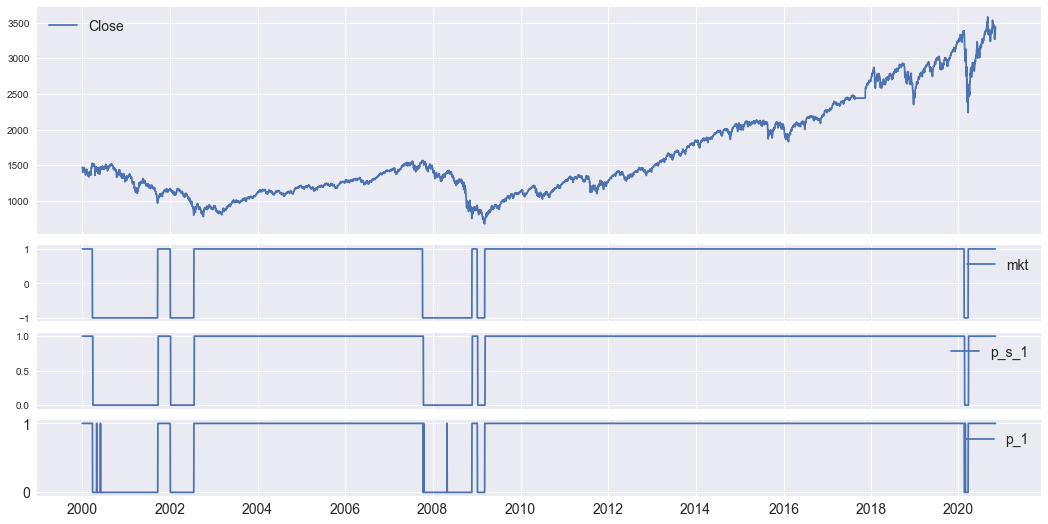

In [354]:
%run fmplot

s=dt.datetime(2000,1,1)
e=dt.datetime(2020,11,5)


fmplot(dfxyp,['Close','mkt','p_s_1','p_1'], plottypes =['line','line','line','line'], 
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right', 'upper right'],
      figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, height_ratios=(3,1,1,1))



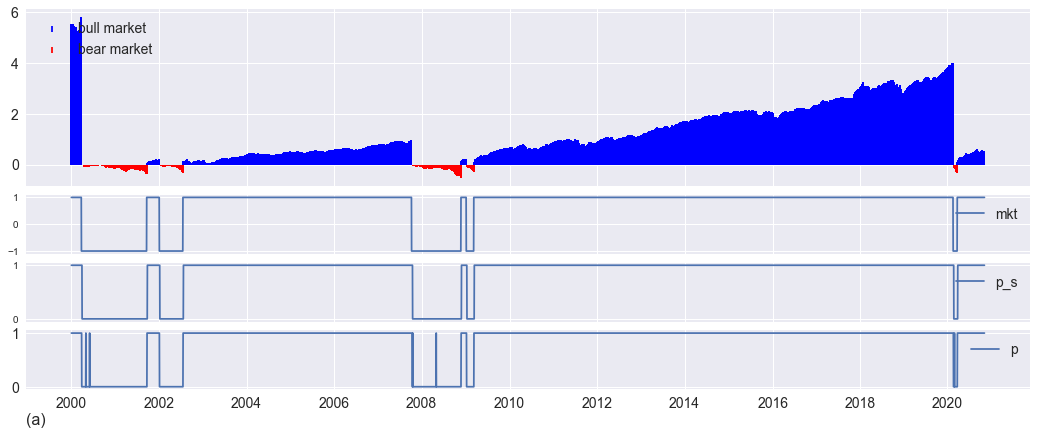

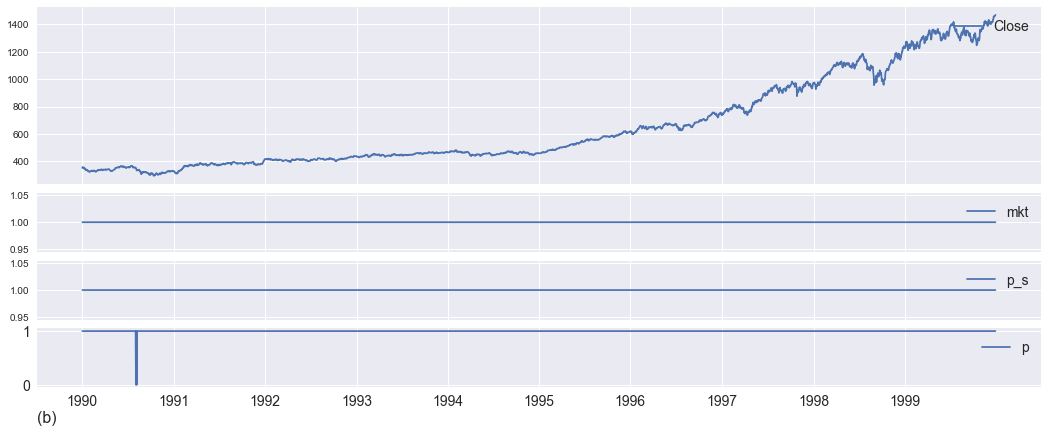

,Close,mkt,p_1,p_s_1
Date,,,,
2020-02-18,3370.290039,1.0,1.0,1.0
2020-02-19,3386.149902,1.0,1.0,1.0
2020-02-20,3373.229980,-1.0,1.0,1.0
2020-02-21,3337.750000,-1.0,0.0,1.0
2020-02-24,3225.889893,-1.0,0.0,1.0
2020-02-25,3128.209961,-1.0,0.0,0.0
2020-02-26,3116.389893,-1.0,0.0,0.0
2020-02-27,2978.760010,-1.0,0.0,0.0


,Close,mkt,p_1,p_s_1
Date,,,,
2020-03-18,2398.100098,-1.0,0.0,0.0
2020-03-19,2409.389893,-1.0,0.0,0.0
2020-03-20,2304.919922,-1.0,0.0,0.0
2020-03-23,2237.399902,-1.0,0.0,0.0
2020-03-24,2447.330078,1.0,1.0,0.0
2020-03-25,2475.560059,1.0,1.0,0.0
2020-03-26,2630.070068,1.0,1.0,1.0
2020-03-27,2541.469971,1.0,1.0,1.0


In [355]:
#startdate=dt.datetime(2008,10,1)
#enddate=dt.datetime(2009,2,1)

#s=dt.datetime(1957,1,1)
s=dt.datetime(2000,1,1)
e=dt.datetime(2020,11,4)

#startdate=dt.datetime(2019,1,1)
#enddate=dt.datetime(2020,8,11)

#startdate=dt.datetime(2000,1,1)
#enddate=dt.datetime(2001,12,31)

#s=dt.datetime(1957,1,1)
#e=dt.datetime(2020,11,4)
fmplot(dfxyp,['mcnr','mkt','p_s','p'], plottypes =['mktcycle','line','line','line'],
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right', 'upper right'],
       figsize=(18,7),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14,
       height_ratios=(3,1,1,1), xlabel = '(a)' , xlabelfontsize=16, xlabelloc=(0,-0.6))



s=dt.datetime(1990,1,1)
e=dt.datetime(1999,12,31)
fmplot(dfxyp,['Close','mkt','p_s','p'], startdate=s, enddate=e, sharex=True,
       llocs=['upper right', 'upper right','upper right', 'upper right'],
      figsize=(18,7),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, 
       height_ratios=(3,1,1,1), xlabel = '(b)' , xlabelfontsize=16,  xlabelloc=(0,-0.6))

display(dfxyp[['Close','mkt','p_1','p_s_1']][dt.datetime(2020,2,18):dt.datetime(2020,2,27)])
display(dfxyp[['Close','mkt','p_1','p_s_1']][dt.datetime(2020,3,18):dt.datetime(2020,3,27)])



In [290]:
# How many market days did we anticipate the bottom of the Bear
d1=dt.datetime(2020,2,19)
d2=dt.datetime(2020,3,23)
# and (dfXaligned.index <= d2
dfXaligned[ (dfXaligned.index > d1) & (dfXaligned.index <= d2)].index.size

24

## Save and Read

In [343]:
# save dataframe
today=dt.datetime.today()
nfeatures=dfTrain.shape[1]
save_model_df=True
if save_model_df==True:
    savedir='./data'
    v='v3'
    s=predict_s
    e=predict_e
    ps = '_ps'+ str(Nsmooth)
    if PCAflag == True: 
        filename='dfxyp'+'_'+model+'_'+v+'_'+'ndays'+str(nmodeltraindays)+'_nfeatures'+str(nfeatures)+ps+'_pca'+str(Npca)+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
    else:
        filename='dfxyp'+'_'+model+'_'+v+'_'+'ndays'+str(nmodeltraindays)+'_nfeatures'+str(nfeatures)+ps+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
    filename=savedir+'/'+filename+'_to_'+str(e.year)+'-'+str(e.month)+'-'+str(e.day)+'.csv'
    print('save file:',filename)
    dfxyp[predict_s:predict_e].reset_index().to_csv(filename,index=False)
    


save file: ./data/dfxyp_XGB_v3_ndays1_nfeatures20_ps5_1957-1-2_to_2020-11-4.csv


In [5]:
# read dfxyp
#filename ='./data/dfxyp_XGB_v3_ndays1_nfeatures20_ps3_2000-1-3_to_2020-11-4.csv'
#filename ='./data/dfxyp_RF_v3_ndays1_nfeatures25_ps3_2000-1-3_to_2020-11-4.csv'
#filename ='./data/dfxyp_DT_v3_ndays1_nfeatures24_ps7_2000-1-3_to_2020-11-4.csv'
filename ='./data/dfxyp_XGB_v3_ndays1_nfeatures20_ps3_1957-1-1_to_2020-11-4.csv'

read=False
if read==True:
    print(filename)
    dfxyp = pd.read_csv(filename,index_col=0,parse_dates=True)
    
    dfxyp.tail(3)    

    # Confusion Matrix "p"
    (accuracy,precision,recall,fscore,dfcma,dfcmr,tp,fp,tn,fn)=fmclfperformance(dfxyp,'y_1','p_1')

    display(dfxyp.head(3))
    display(dfxyp.tail(3))

In [232]:
# save model pickle 


save_model_pickle=True

if save_model_pickle==True:
    v='v3'
    nfeatures=dfTrain.shape[1]
    ps = '_ps'+ str(smooth)
    if PCAflag == True:
        filename='pickle'+'_'+model+'_'+v+'_'+'ndays'+str(nmodeltraindays)+'_nfeatures'+str(nfeatures)+'_pca'+ps+str(Npca)+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
        filename=savedir+'/'+filename+'_to_'+str(e.year)+'-'+str(e.month)+'-'+str(e.day)
    else:
        filename='pickle'+'_'+model+'_'+v+'_'+'ndays'+str(nmodeltraindays)+'_nfeatures'+str(nfeatures)+ps+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
        filename=savedir+'/'+filename+'_to_'+str(e.year)+'-'+str(e.month)+'-'+str(e.day)
    with open(filename,'wb') as fout:
        pickle.dump(clf,fout)
    print('save filename:',filename)
   

save filename: ./data/pickle_XGB_v3_ndays1_nfeatures20_ps3_1957-1-1_to_2020-11-4


In [2]:
# Read pickle
read_model_pickle=False

filename = './data/pickle_XGB_v3_ndays1_nfeatures20_1957-1-1_to_2020-11-4'
#filename = './data/pickle_XGB_v3_days5_nfeatures23_2000-1-3_to_2020-11-4'
if read_model_pickle==True:
    print(filename)
    with open(filename, 'rb') as fin:
        clf = pickle.load(fin)

# Feature Importance

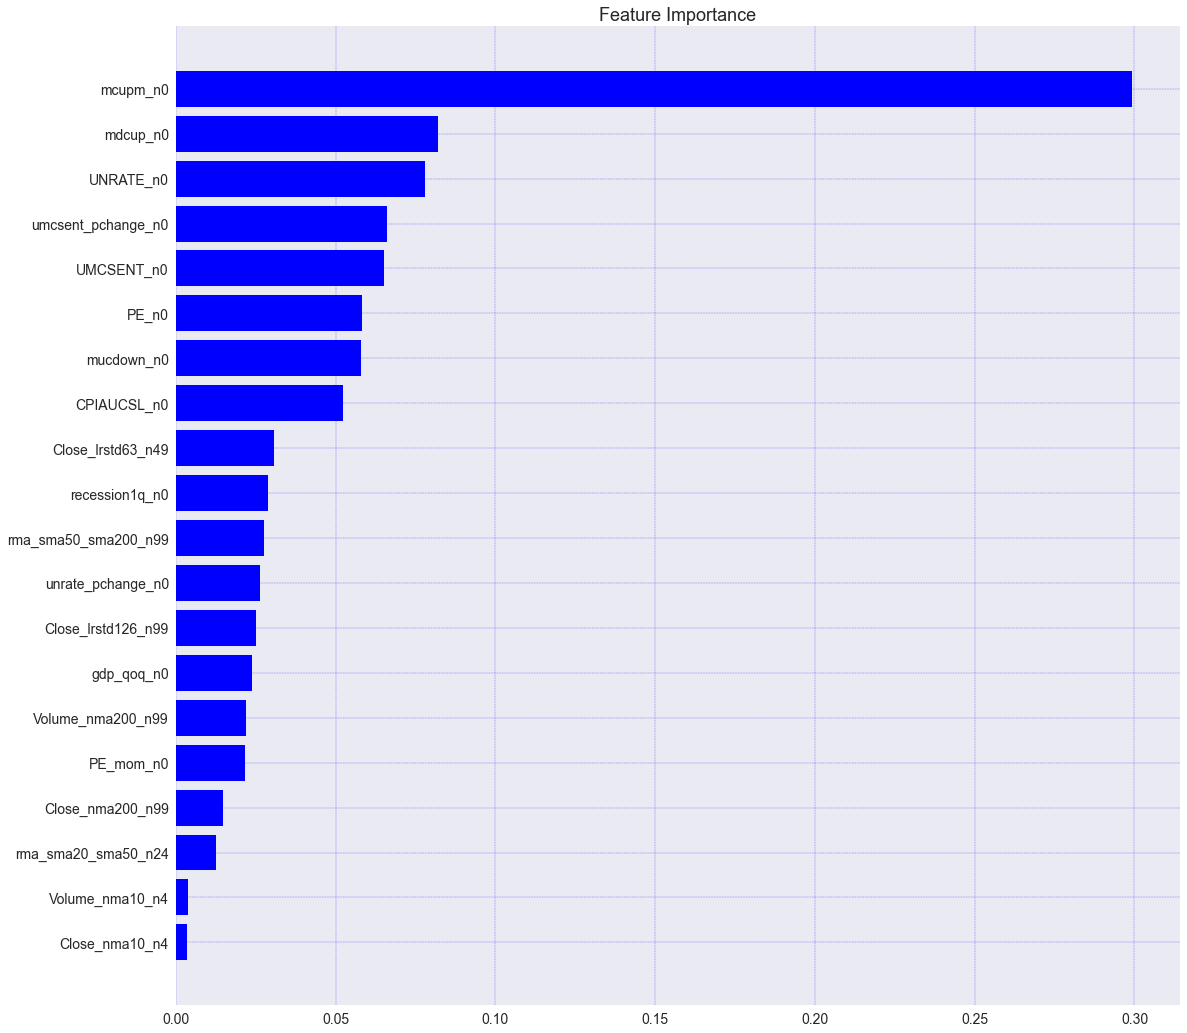

20
[0.00361876 0.00379214 0.01268171 0.01466801 0.02172307 0.02185565
 0.02386896 0.02518746 0.02635254 0.02753192 0.02873412 0.03078326
 0.05224508 0.05805595 0.05817316 0.06512493 0.06612193 0.07811537
 0.08201519 0.2993507 ]
['Close_nma10_n4', 'Volume_nma10_n4', 'rma_sma20_sma50_n24', 'Close_nma200_n99', 'PE_mom_n0', 'Volume_nma200_n99', 'gdp_qoq_n0', 'Close_lrstd126_n99', 'unrate_pchange_n0', 'rma_sma50_sma200_n99', 'recession1q_n0', 'Close_lrstd63_n49', 'CPIAUCSL_n0', 'mucdown_n0', 'PE_n0', 'UMCSENT_n0', 'umcsent_pchange_n0', 'UNRATE_n0', 'mdcup_n0', 'mcupm_n0']


In [234]:
# vertical bars


importances=clf.feature_importances_
HorizontalBars=True   
if HorizontalBars == True:  # horizontal looks good with many variable, 
    indices = list(np.argsort(importances))
else:                   # vertical for fewer variables
    # sort importances descending
    indices = list(np.argsort(importances)[::-1])

# rearange feature names so they match the sorted features
feature_names=dfTrain.columns
names = [ feature_names[i] for i in indices]

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[18,18])
if HorizontalBars == True:
    ax.barh(names, importances[indices], color = 'blue', align ='center')
    xticklabel_rotation = 0
else:
    ax.bar(names, importances[indices], color = 'blue')
    xticklabel_rotation = 60
   
plt.xticks(rotation=xticklabel_rotation,fontsize=14)
plt.yticks(fontsize=14)
ax.grid(color='b', ls = '-.', lw = 0.25)
ax.set_title("Feature Importance",fontsize=18)

# Show plot
plt.show()

# Print Importances
print(len(importances))
print(importances[indices])
print(names)


# Model Explainability

In [104]:
# Decision Tree 

from sklearn import tree
from sklearn.tree import export_text
fig = plt.figure(figsize=(25,20))

feature_names=list(dfTrain.columns)
#_ = tree.plot_tree(clf, feature_names=feature_names, class_names=['up','down'],filled=True)
#fig.savefig("DecisionTree.png")
t=tree.export_text(clf,feature_names=feature_names)
print(t)

#with open("decistion_tree.log", "w") as fout:
#    fout.write(t)

|--- umcsent_pchange_nd0 <= -0.71
|   |--- UNRATE_nd0 <= -0.47
|   |   |--- PE_nd0 <= -0.21
|   |   |   |--- Close_nma50_nd24 <= -1.84
|   |   |   |   |--- Close_lrstd126_nd99 <= -0.83
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Close_lrstd126_nd99 >  -0.83
|   |   |   |   |   |--- mdcup_nd0 <= -0.03
|   |   |   |   |   |   |--- ADX_nd24 <= 1.32
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- ADX_nd24 >  1.32
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- mdcup_nd0 >  -0.03
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- Close_nma50_nd24 >  -1.84
|   |   |   |   |--- rma_sma20_sma50_nd24 <= -1.94
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- rma_sma20_sma50_nd24 >  -1.94
|   |   |   |   |   |--- Close_nma20_nd9 <= -2.25
|   |   |   |   |   |   |--- PDI50_nd24 <= -0.06
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- PDI50_nd24 >  -0.06
|   |   |   |   |   |   |   |--- class: 1.0
|   

<Figure size 1800x1440 with 0 Axes>

# Backtest

#### Backtest Dataframes from 1960 to 2020-11-4

In [334]:
se=(dt.datetime(1960,1,1),dt.datetime(2020,11,4))
dftsummary,dfbt=fmbacktest(dfxyp[se[0]:se[1]].copy(),price_variable,'p')
dftsummary

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
1960,1960-01-01,1961-01-01,59.889999,58.110001,59.889999,57.230475,-0.029721,-0.044407
1961,1961-01-01,1962-01-01,58.110001,71.550003,57.230475,70.920092,0.231286,0.239202
1962,1962-01-01,1962-12-31,71.550003,63.099998,70.920092,86.383646,-0.118099,0.218042
1963,1963-01-01,1963-12-31,63.099998,75.019997,86.383646,102.409357,0.188906,0.185518
1964,1964-01-01,1964-12-31,75.019997,84.750000,102.409357,115.507059,0.129699,0.127896
...,...,...,...,...,...,...,...,...
2016,2016-01-01,2017-01-01,2043.939941,2238.830078,87334.953526,95662.361155,0.095350,0.095350
2017,2017-01-01,2018-01-01,2238.830078,2673.610107,95662.361155,114239.958698,0.194200,0.194200
2018,2018-01-01,2018-12-31,2673.610107,2506.850098,114239.958698,107114.515654,-0.062373,-0.062373
2019,2019-01-01,2019-12-31,2506.850098,3230.780029,107114.515654,138047.120674,0.288781,0.288781


**BACKTEST 2020**

In [337]:
%run fmml
price_variable='Close'
se=(dt.datetime(2020,1,1),dt.datetime(2020,11,4))
dftsummary,dfbt=fmbacktest(dfxyp[se[0]:se[1]].copy(),price_variable,'p_s')
dftsummary.T

,2020
start_date,2020-01-01 00:00:00
end_date,2020-11-04 00:00:00
start_price,3230.78
end_price,3443.44
start_strategyvalue,3230.78
end_strategyvalue,4095.63
r,0.0658231
r_strategy,0.267692


In [293]:
dfxyp.head()

,Close,Volume,High,Low,PE,Earnings,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date,p_s_1,p_s
Date,,,,,,,,,,,,,,,,,
1955-01-01,35.980000,3840000.0,35.980000,35.980000,12.62,2.693344,1.159664,1.0,0.0,0.000000,1.0,NaN,NaN,NaN,NaT,NaN,NaN
1955-01-03,36.750000,4570000.0,36.750000,36.750000,12.62,2.693344,1.205882,1.0,0.0,0.000000,1.0,NaN,NaN,NaN,NaT,NaN,NaN
1955-01-04,36.419998,4420000.0,36.419998,36.419998,12.62,2.693344,1.186074,1.0,0.0,0.008980,1.0,NaN,NaN,NaN,NaT,NaN,NaN
1955-01-05,35.520000,4640000.0,35.520000,35.520000,12.62,2.693344,1.132053,1.0,0.0,0.033469,1.0,NaN,NaN,NaN,NaT,NaN,NaN
1955-01-06,35.040001,5300000.0,35.040001,35.040001,12.62,2.693344,1.103241,1.0,0.0,0.046531,1.0,NaN,NaN,NaN,NaT,NaN,NaN


**BACKTEST 2000 - 2020**

In [303]:
se=(dt.datetime(2000,1,1),dt.datetime(2020,12,31))
dftsummary,dfbt=fmbacktest(dfxyp[se[0]:se[1]].copy(),price_variable,'p_s')
dftsummary[['start_price','end_price','start_strategyvalue', 'end_strategyvalue', 'r', 'r_strategy']]

,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
2000,1469.250000,1320.280029,1469.250000,1508.520020,-0.101392,0.026728
2001,1320.280029,1148.079956,1508.520020,1700.259789,-0.130427,0.127105
2002,1148.079956,879.820007,1700.259789,1773.344527,-0.233660,0.042984
2003,879.820007,1111.920044,1773.344527,2241.159906,0.263804,0.263804
2004,1111.920044,1211.920044,2241.159906,2442.717556,0.089935,0.089935
2005,1211.920044,1248.290039,2442.717556,2516.024063,0.030010,0.030010
2006,1248.290039,1418.300049,2516.024063,2858.692243,0.136194,0.136194
2007,1418.300049,1468.359985,2858.692243,3101.024965,0.035296,0.084770
2008,1468.359985,903.250000,3101.024965,3266.892255,-0.384858,0.053488
2009,903.250000,1115.099976,3266.892255,4783.126300,0.234542,0.464121


**BACKTEST 2000 - 2020**

In [338]:
se=(dt.datetime(2000,1,1),dt.datetime(2020,12,31))
dftsummary,dfbt=fmbacktest(dfxyp[se[0]:se[1]].copy(),price_variable,'p_s')
dftsummary

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
2000,2000-01-01,2001-01-01,1469.250000,1320.280029,1469.250000,1487.920044,-0.101392,0.012707
2001,2001-01-01,2001-12-31,1320.280029,1148.079956,1487.920044,1677.041462,-0.130427,0.127105
2002,2002-01-01,2002-12-31,1148.079956,879.820007,1677.041462,1740.734561,-0.233660,0.037979
2003,2003-01-01,2003-12-31,879.820007,1111.920044,1740.734561,2199.947301,0.263804,0.263804
2004,2004-01-01,2004-12-31,1111.920044,1211.920044,2199.947301,2397.798514,0.089935,0.089935
2005,2005-01-01,2006-01-01,1211.920044,1248.290039,2397.798514,2469.756991,0.030010,0.030010
2006,2006-01-01,2007-01-01,1248.290039,1418.300049,2469.756991,2806.123859,0.136194,0.136194
2007,2007-01-01,2007-12-31,1418.300049,1468.359985,2806.123859,3049.362024,0.035296,0.086681
2008,2008-01-01,2008-12-31,1468.359985,903.250000,3049.362024,3212.465972,-0.384858,0.053488
2009,2009-01-01,2009-12-31,903.250000,1115.099976,3212.465972,4597.310634,0.234542,0.431085


In [317]:
se=(dt.datetime(1980,1,1),dt.datetime(1989,12,31))
dftsummary,dfbt=fmbacktest(dfxyp[se[0]:se[1]].copy(),price_variable,'p_s')
dftsummary

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
1980,1980-01-01,1980-12-31,107.940002,135.759995,107.940002,136.479996,0.257736,0.264406
1981,1981-01-01,1981-12-31,135.759995,122.550003,136.479996,136.479996,-0.097304,0.000000
1982,1982-01-01,1982-12-31,122.550003,140.639999,136.479996,165.313464,0.147613,0.211265
1983,1983-01-01,1984-01-01,140.639999,164.929993,165.313464,193.864823,0.172710,0.172710
1984,1984-01-01,1984-12-31,164.929993,167.240005,193.864823,196.580097,0.014006,0.014006
1985,1985-01-01,1985-12-31,167.240005,211.279999,196.580097,248.346337,0.263334,0.263334
1986,1986-01-01,1986-12-31,211.279999,242.169998,248.346337,284.655586,0.146204,0.146204
1987,1987-01-01,1987-12-31,242.169998,247.080002,284.655586,397.594059,0.020275,0.396755
1988,1988-01-01,1989-01-01,247.080002,277.720001,397.594059,446.899067,0.124008,0.124008
1989,1989-01-01,1989-12-29,277.720001,353.399994,446.899067,568.681143,0.272505,0.272505


In [318]:
se=(dt.datetime(1990,1,1),dt.datetime(1999,12,31))
dftsummary,dfbt=fmbacktest(dfxyp[se[0]:se[1]].copy(),price_variable,'p_s')
dftsummary

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
1990,1990-01-01,1990-12-31,353.399994,330.220001,353.399994,340.111905,-0.065591,-0.037601
1991,1991-01-01,1991-12-31,330.220001,417.089996,340.111905,429.584133,0.263067,0.263067
1992,1992-01-01,1992-12-31,417.089996,435.709991,429.584133,448.761899,0.044643,0.044643
1993,1993-01-01,1993-12-31,435.709991,466.450012,448.761899,480.422753,0.070552,0.070552
1994,1994-01-01,1995-01-01,466.450012,459.269989,480.422753,473.027649,-0.015393,-0.015393
1995,1995-01-01,1996-01-01,459.269989,615.929993,473.027649,634.380481,0.341107,0.341107
1996,1996-01-01,1996-12-31,615.929993,740.739990,634.380481,762.929223,0.202637,0.202637
1997,1997-01-01,1997-12-31,740.739990,970.429993,762.929223,999.499704,0.310082,0.310082
1998,1998-01-01,1998-12-31,970.429993,1229.229980,999.499704,1266.052173,0.266686,0.266686
1999,1999-01-01,1999-12-31,1229.229980,1469.250000,1266.052173,1513.262111,0.195260,0.195260


**BACKTEST BY DECADE AND SAVE (for plotting results)**

In [345]:
# backtest by decade
%run fmml

se_list=[ (dt.datetime(1960,1,1),dt.datetime(1969,12,31)), 
          (dt.datetime(1970,1,1),dt.datetime(1979,12,31)),
          (dt.datetime(1980,1,1),dt.datetime(1989,12,31)),
          (dt.datetime(1990,1,1),dt.datetime(1999,12,31)),
          (dt.datetime(2000,1,1),dt.datetime(2009,12,31)),
          (dt.datetime(2010,1,1),dt.datetime(2019,12,31)),
          (dt.datetime(2020,1,1),dt.datetime(2020,11,4)),
          (dt.datetime(1960,1,1),dt.datetime(2020,11,4)),
          (dt.datetime(1957,1,1),dt.datetime(2020,11,4)) ]


dir='./data/'
dict_dfbktest={}

dfbktest_flist=[]
dict_dfbktest={}
for se in se_list:
    s=se[0]
    e=se[1]
    price_variable='Close'
    predictor='p'
    (dftsummary,dfbt)=fmbacktest(dfxyp[se[0]:se[1]].copy(),price_variable,predictor)
    dfbt['Close_strategyvalue_p']=dfbt['Close_strategyvalue']
    dfbt.drop('Close_strategyvalue',axis=1,inplace=True)
    
    predictor='p_s'
    (dftsummary,dfbt_tmp)=fmbacktest(dfxyp[se[0]:se[1]].copy(),price_variable,predictor)
    dfbt['Close_strategyvalue_ps']=dfbt_tmp['Close_strategyvalue']
    
    dfname = 'dfbktest_xgbv3_features20_ps5_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
    dfname = dfname+'_to_'+str(e.year)+'-'+str(e.month)+'-'+str(e.day)
    filename=dir+dfname+'.csv'
    
    dfbktest_flist = dfbktest_flist+[filename]
    dict_dfbktest[dfname] = dfbt
    
    print('dfname =',dfname)
    print('  s_index =',dfbt.index[0],'e_index =', dfbt.index[dfbt.index.size-1])
    print('  filename=',filename)

    
    # SAVE TO FILE
    dfbt.reset_index().to_csv(filename,index=False)

print(list(dict_dfbktest.keys()))    

dfname = dfbktest_xgbv3_features20_ps5_1960-1-1_to_1969-12-31
  s_index = 1960-01-01 00:00:00 e_index = 1969-12-31 00:00:00
  filename= ./data/dfbktest_xgbv3_features20_ps5_1960-1-1_to_1969-12-31.csv
dfname = dfbktest_xgbv3_features20_ps5_1970-1-1_to_1979-12-31
  s_index = 1970-01-01 00:00:00 e_index = 1979-12-31 00:00:00
  filename= ./data/dfbktest_xgbv3_features20_ps5_1970-1-1_to_1979-12-31.csv
dfname = dfbktest_xgbv3_features20_ps5_1980-1-1_to_1989-12-31
  s_index = 1980-01-01 00:00:00 e_index = 1989-12-29 00:00:00
  filename= ./data/dfbktest_xgbv3_features20_ps5_1980-1-1_to_1989-12-31.csv
dfname = dfbktest_xgbv3_features20_ps5_1990-1-1_to_1999-12-31
  s_index = 1990-01-01 00:00:00 e_index = 1999-12-31 00:00:00
  filename= ./data/dfbktest_xgbv3_features20_ps5_1990-1-1_to_1999-12-31.csv
dfname = dfbktest_xgbv3_features20_ps5_2000-1-1_to_2009-12-31
  s_index = 2000-01-01 00:00:00 e_index = 2009-12-31 00:00:00
  filename= ./data/dfbktest_xgbv3_features20_ps5_2000-1-1_to_2009-12-31.csv


In [308]:
dict_dfbktest['dfbktest_xgbv3_features20_ps4_1960-1-1_to_1969-12-31'].tail(3)

,Close,Volume,High,Low,PE,Earnings,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date,p_s_1,p_s,Close_R,Close_strategyvalue_p,Close_strategyvalue_ps
Date,,,,,,,,,,,,,,,,,,,,
1969-12-29,91.250000,12500000.0,92.489998,90.660004,15.76,5.914975,-0.157977,1.0,0.0,0.157977,-1.0,0.0,0.0,0.0,1969-12-26,0.0,0.0,-0.006965,181.764968,168.945862
1969-12-30,91.599998,15790000.0,92.199997,90.470001,15.76,5.914975,-0.154748,1.0,0.0,0.154748,-1.0,0.0,0.0,0.0,1969-12-29,0.0,0.0,0.003836,181.764968,168.945862
1969-12-31,92.059998,19380000.0,92.940002,91.150002,15.76,5.914975,-0.150503,1.0,0.0,0.150503,-1.0,0.0,0.0,0.0,1969-12-30,0.0,0.0,0.005022,181.764968,168.945862


In [148]:
# Read dict_bktest

keys =['dfbktest_xgbv3_features20_ps3_1960-1-1_to_1969-12-31', 
       'dfbktest_xgbv3_features20_ps3_1970-1-1_to_1979-12-31', 
       'dfbktest_xgbv3_features20_ps3_1980-1-1_to_1989-12-31', 
       'dfbktest_xgbv3_features20_ps3_1990-1-1_to_1999-12-31',
       'dfbktest_xgbv3_features20_ps3_2000-1-1_to_2009-12-31', 
       'dfbktest_xgbv3_features20_ps3_2010-1-1_to_2019-12-31',
       'dfbktest_xgbv3_features20_ps3_2020-1-1_to_2020-11-4', 
       'dfbktest_xgbv3_features20_ps3_1960-1-1_to_2020-11-4',
       'dfbktest_xgbv3_features20_ps3_1957-1-1_to_2020-11-4']
dict_dfbktest={}
dir='./data/'
for k in keys:
    filename = dir+k+'.csv'
    dict_dfbktest[k]=pd.read_csv(filename,index_col=0,parse_dates=True)

dict_dfbktest['dfbktest_xgbv3_features20_ps3_1960-1-1_to_1969-12-31'].tail(3)

,Close,Volume,High,Low,PE,Earnings,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date,p_s,Close_R,Close_strategyvalue_p,Close_strategyvalue_ps
Date,,,,,,,,,,,,,,,,,,,
1969-12-29,91.250000,12500000.0,92.489998,90.660004,15.76,5.914975,-0.157977,1.0,0.0,0.157977,-1.0,0.0,0.0,0.0,1969-12-26,0.0,-0.006965,181.764968,169.708065
1969-12-30,91.599998,15790000.0,92.199997,90.470001,15.76,5.914975,-0.154748,1.0,0.0,0.154748,-1.0,0.0,0.0,0.0,1969-12-29,0.0,0.003836,181.764968,169.708065
1969-12-31,92.059998,19380000.0,92.940002,91.150002,15.76,5.914975,-0.150503,1.0,0.0,0.150503,-1.0,0.0,0.0,0.0,1969-12-30,0.0,0.005022,181.764968,169.708065


#### Graph XGB, RF, and DT Results

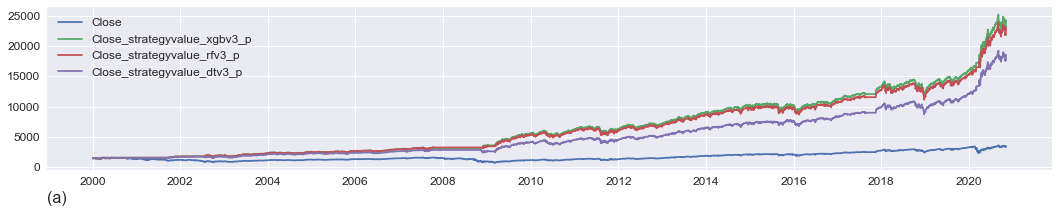

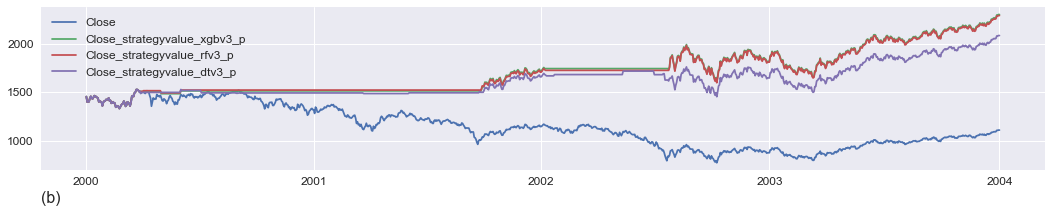

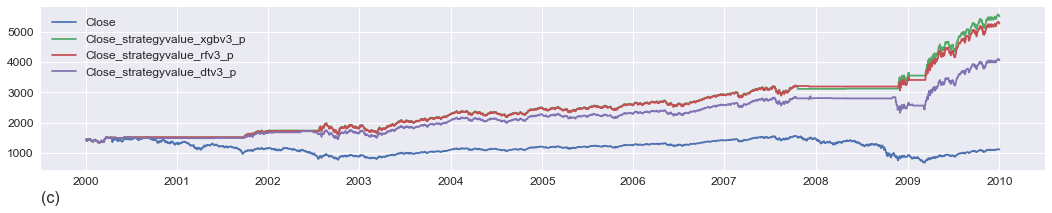

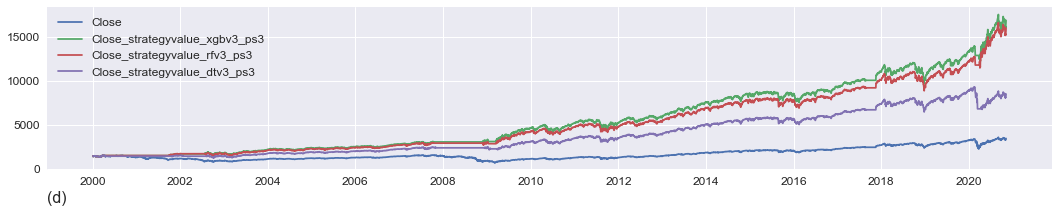

In [347]:
%run fmplot


variables=[['Close','Close_strategyvalue_xgbv3_p',
           'Close_strategyvalue_rfv3_p','Close_strategyvalue_dtv3_p']]
fmplot(dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3,variables, figsize=(18,3), xlabel= '(a)', xlabelfontsize=16)


s=dt.datetime(2000,1,1)
e=dt.datetime(2004,1,1)
variables=[['Close','Close_strategyvalue_xgbv3_p',
           'Close_strategyvalue_rfv3_p','Close_strategyvalue_dtv3_p']]
fmplot(dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3,variables, figsize=(18,3), 
       startdate=s, enddate=e, xlabel = '(b)' , xlabelfontsize=16)

s=dt.datetime(2000,1,1)
e=dt.datetime(2010,1,1)
variables=[['Close','Close_strategyvalue_xgbv3_p',
           'Close_strategyvalue_rfv3_p','Close_strategyvalue_dtv3_p']]
fmplot(dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3[s:e],variables,figsize=(18,3),
           startdate=s, enddate=e, xlabel= '(c)', xlabelfontsize=16 )

variables=[['Close','Close_strategyvalue_xgbv3_ps3',
           'Close_strategyvalue_rfv3_ps3','Close_strategyvalue_dtv3_ps3']]
fmplot(dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3,variables, figsize=(18,3), xlabel= '(d)', xlabelfontsize=16)

#### Graph 2003 to 2004 predicted signal and smoothed prediction signal

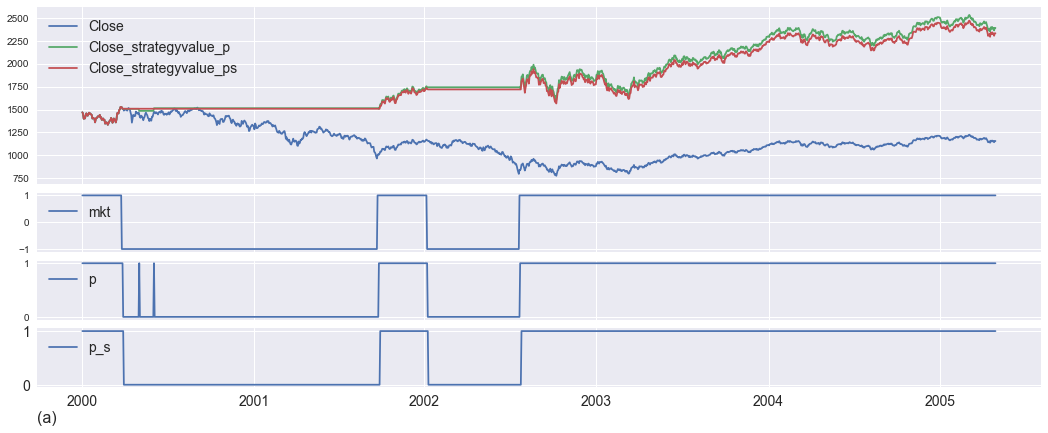

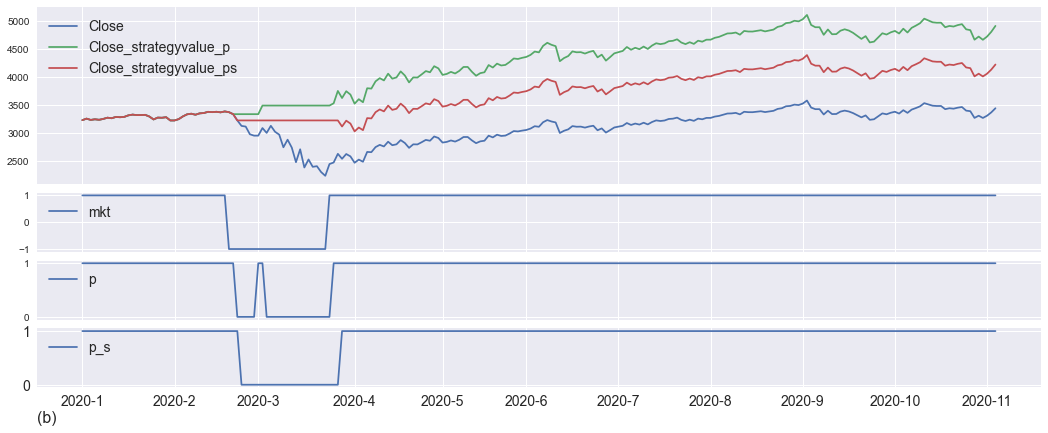

,mkt,p,p_s
Date,,,
2000-03-20,1.0,1.0,1.0
2000-03-21,1.0,1.0,1.0
2000-03-22,1.0,1.0,1.0
2000-03-23,1.0,1.0,1.0
2000-03-24,1.0,1.0,1.0
2000-03-27,-1.0,1.0,1.0
2000-03-28,-1.0,1.0,1.0
2000-03-29,-1.0,0.0,1.0
2000-03-30,-1.0,0.0,0.0


In [324]:
%run fmplot
df=dict_dfbktest['dfbktest_xgbv3_features20_ps5_2000-1-1_to_2009-12-31']
s=dt.datetime(2000,1,1)
e=dt.datetime(2005,5,1)
variables=[['Close','Close_strategyvalue_p','Close_strategyvalue_ps'],'mkt','p','p_s']
fmplot(df,variables, figsize=(18,7), startdate=s, enddate=e, sharex=True, height_ratios=(3,1,1,1),
      ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, xlabel='(a)', xlabelloc=(0,-0.6),
      xlabelfontsize=16)

df=dict_dfbktest['dfbktest_xgbv3_features20_ps5_2020-1-1_to_2020-11-4']
s=dt.datetime(2020,1,1)
e=dt.datetime(2020,11,4)
variables=[['Close','Close_strategyvalue_p','Close_strategyvalue_ps'],'mkt','p','p_s']
fmplot(df,variables, figsize=(18,7), startdate=s, enddate=e, sharex=True, height_ratios=(3,1,1,1),
      ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, xlabel='(b)', xlabelloc=(0,-0.6), 
       xlabelfontsize=16)

df=dict_dfbktest['dfbktest_xgbv3_features20_ps5_2000-1-1_to_2009-12-31']
df[['mkt', 'p','p_s']][dt.datetime(2000,3,20):dt.datetime(2000,4,1)]

#### Graphs from 1960 to 2020 11 4

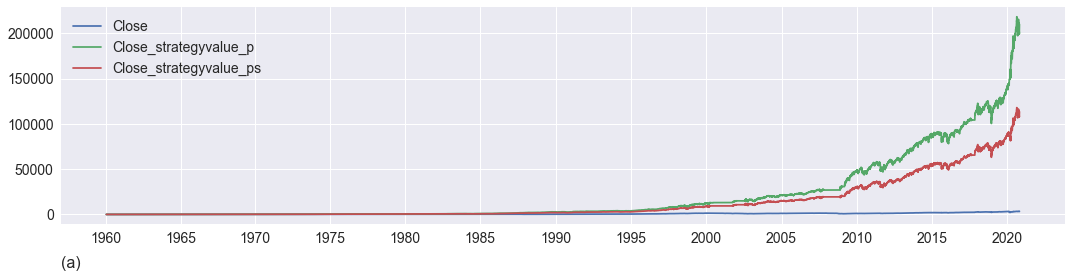

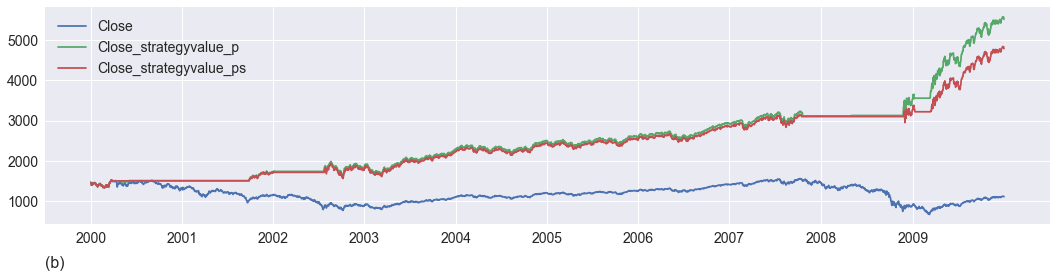

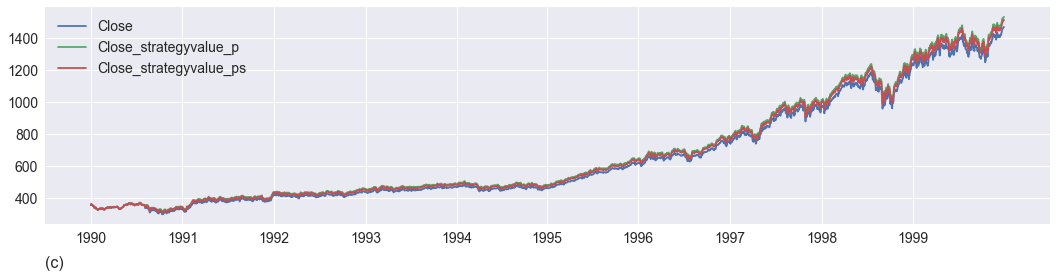

In [312]:
#['dfbktest_xgbv3_features20_ps3_1960-1-1-1_to_1969-12-31', 'dfbktest_xgbv3_features20_ps3_1970-1-1-1_to_1979-12-31', 
# 'dfbktest_xgbv3_features20_ps3_1980-1-1-1_to_1989-12-31', 'dfbktest_xgbv3_features20_ps3_1990-1-1-1_to_1999-12-31', 
# 'dfbktest_xgbv3_features20_ps3_2000-1-1-1_to_2009-12-31', 'dfbktest_xgbv3_features20_ps3_2010-1-1-1_to_2019-12-31', 
# 'dfbktest_xgbv3_features20_ps3_2020-1-1-1_to_2020-11-4', 'dfbktest_xgbv3_features20_ps3_1960-1-1-1_to_2020-11-4']


df=dict_dfbktest['dfbktest_xgbv3_features20_ps5_1960-1-1_to_2020-11-4']
fmplot(df,[['Close','Close_strategyvalue_p','Close_strategyvalue_ps']], 
       figsize=(18,4),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, xlabel='(a)',
      xlabelfontsize=16)

# skip 2010 to 2019 since there are no downcycles ... all curves will be on top of each other
df=dict_dfbktest['dfbktest_xgbv3_features20_ps5_2000-1-1_to_2009-12-31']
fmplot(df,[['Close','Close_strategyvalue_p','Close_strategyvalue_ps']], 
       figsize=(18,4),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14,  xlabel='(b)',
      xlabelfontsize=16)

df=dict_dfbktest['dfbktest_xgbv3_features20_ps5_1990-1-1_to_1999-12-31']
fmplot(df,[['Close','Close_strategyvalue_p','Close_strategyvalue_ps']], 
       figsize=(18,4),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14,  xlabel='(c)',
      xlabelfontsize=16)

In [744]:
# read dataframe
#filename='./data/dfxyp_XGB_v3_ndays1_nfeatures20_ps3_2000-1-3_to_2020-11-4.csv'
#filename='./data/dfxyp_RF_v3_ndays1_nfeatures25_ps3_2000-1-3_to_2020-11-4.csv'
#filename='./data/dfxyp_DT_v3_ndays1_nfeatures24_pc7_2000-1-3_to_2020-11-4.csv'
read=False
if read==True:
    print(filename)
    df = pd.read_csv(filename,index_col=0,parse_dates=True)
    
(accuracy,precision,recall,fscore,dfcma,dfcmr,tp,fp,tn,fn)=fmclfperformance(df,'y_1','p_1')

df.head(3)

./data/dfxyp_RF_v3_ndays1_nfeatures25_ps3_2000-1-3_to_2020-11-4.csv


,Predicted Positive,Predicted Negative,Totals
actual Positive,859,19,877
actual Negative,11,4454,4465


posvalue = 0 negvalue = 1
accuracy = 0.9943851768669287
precision (tp /(tp + fp))= 0.9873563218390805
recall tp /(tp + fn) = 0.9783599088838268
fscore = 2*precision*recall / (precision + recall) =  0.982837528604119
tp = 859 fp = 11 tn = 4454 fn = 19


,Close,Volume,High,Low,PE,Earnings,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date,p_s
Date,,,,,,,,,,,,,,,,
2000-01-03,1455.219971,9.318000e+08,1478.000000,1438.359985,29.66,47.124746,5.498839,1.0,0.0,0.009549,1.0,NaN,1.0,1.0,2000-01-01,NaN
2000-01-04,1399.420044,1.009000e+09,1455.219971,1397.430054,29.66,47.124746,5.249643,1.0,0.0,0.047528,1.0,1.0,1.0,1.0,2000-01-03,NaN
2000-01-05,1402.109985,1.085500e+09,1413.270020,1377.680054,29.66,47.124746,5.261656,1.0,0.0,0.045697,1.0,1.0,1.0,1.0,2000-01-04,NaN


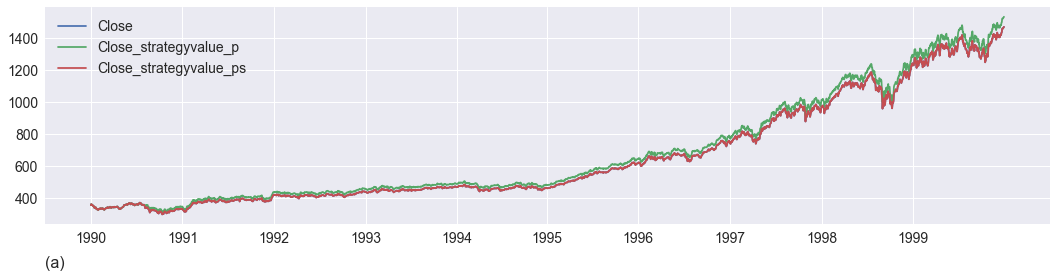

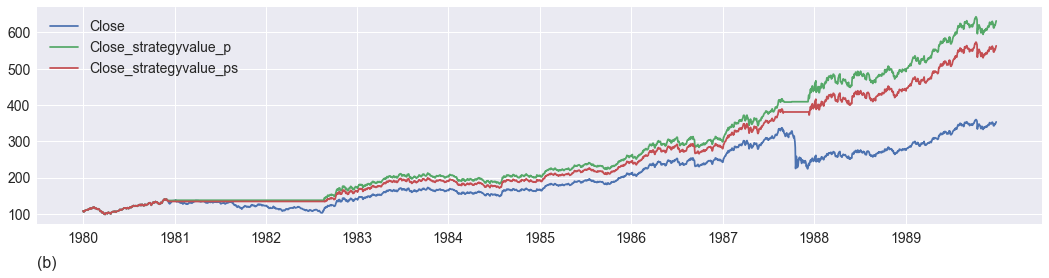

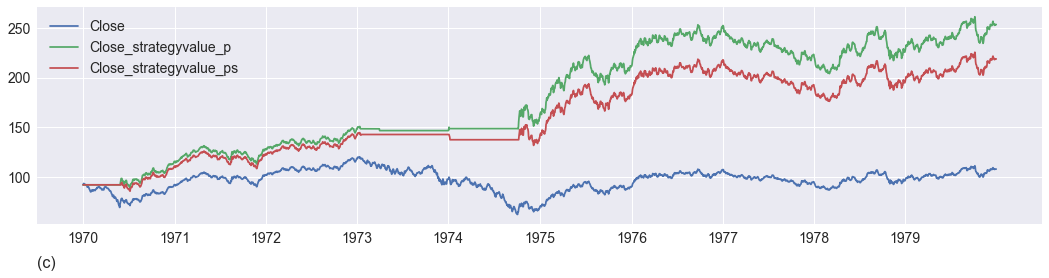

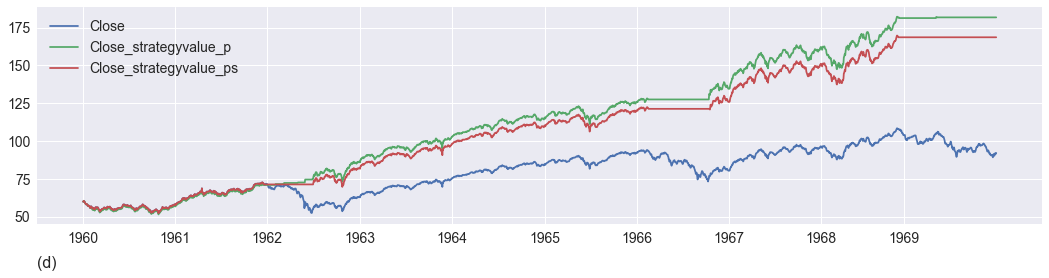

In [349]:
%run fmplot
df=dict_dfbktest['dfbktest_xgbv3_features20_ps5_1990-1-1_to_1999-12-31']
fmplot(df,[['Close','Close_strategyvalue_p','Close_strategyvalue_ps']], 
       figsize=(18,4),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14,  xlabel='(a)',
      xlabelfontsize=16)
df=dict_dfbktest['dfbktest_xgbv3_features20_ps5_1980-1-1_to_1989-12-31']
fmplot(df,[['Close','Close_strategyvalue_p','Close_strategyvalue_ps']], 
       figsize=(18,4),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, xlabel ='(b)',
       xlabelfontsize=16)

df=dict_dfbktest['dfbktest_xgbv3_features20_ps5_1970-1-1_to_1979-12-31']
fmplot(df,[['Close','Close_strategyvalue_p','Close_strategyvalue_ps']], 
       figsize=(18,4),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, xlabel ='(c)',
      xlabelfontsize=16)

df=dict_dfbktest['dfbktest_xgbv3_features20_ps5_1960-1-1_to_1969-12-31']
fmplot(df,[['Close','Close_strategyvalue_p','Close_strategyvalue_ps']], 
       figsize=(18,4),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, xlabel ='(d)',
       xlabelfontsize=16)

#### Combine XGB, DT, and RF results for Graph Comparison

In [745]:
# Combine data frames from DT, RF, XGB

#dfxyp_xgbv3_20 = df
#dfxyp_rfv3_25 = df
#dfxyp_dtv3_24 = df
#dfxyp_xgbv3_20.head(3)

_=fmclfperformance(df,'y_1','p_1')

,Predicted Positive,Predicted Negative,Totals
actual Positive,859,19,877
actual Negative,11,4454,4465


posvalue = 0 negvalue = 1
accuracy = 0.9943851768669287
precision (tp /(tp + fp))= 0.9873563218390805
recall tp /(tp + fn) = 0.9783599088838268
fscore = 2*precision*recall / (precision + recall) =  0.982837528604119
tp = 859 fp = 11 tn = 4454 fn = 19


In [32]:
#SAVE
s=dt.datetime(2000,1,1)
e=dt.datetime(2020,11,4)
filename='./data/dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3.csv'
print(filename)
dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3[s:e].reset_index().to_csv(filename,index=False)

./data/dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3.csv


In [45]:
# READ
filename='./data/dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3.csv'
read=True
if read==True:
    print(filename)
    df = pd.read_csv(filename,index_col=0,parse_dates=True)
    dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3 = df
dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3.head()

./data/dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3.csv


,Close,Close_strategyvalue_xgbv3_p,Close_strategyvalue_xgbv3_ps3,Close_strategyvalue_rfv3_p,Close_strategyvalue_dtv3_p,Close_strategyvalue_rfv3_ps3,Close_strategyvalue_dtv3_ps3
Date,,,,,,,
2000-01-03,1455.219971,1455.219971,1455.219971,1455.219971,1455.219971,1455.219971,1455.219971
2000-01-04,1399.420044,1399.420044,1399.420044,1399.420044,1399.420044,1399.420044,1399.420044
2000-01-05,1402.109985,1402.109985,1402.109985,1402.109985,1402.109985,1402.109985,1402.109985
2000-01-06,1403.449951,1403.449951,1403.449951,1403.449951,1403.449951,1403.449951,1403.449951
2000-01-07,1441.469971,1441.469971,1441.469971,1441.469971,1441.469971,1441.469971,1441.469971


In [752]:
# BACKTEST
#dfxyp_xgbv3_20 = df
#dfxyp_rfv3_25 = df
#dfxyp_dtv3_24 = df

price_variable='Close'
predictor='p_s'
print('predictor =',predictor)
(dftsummary,dfreturns,dfbt)=fmbacktest(dfxyp_rfv3_25,price_variable,predictor)

predictor = p_s


In [ ]:
# Create combined backtest dataframe for xgb, rf, dt
#dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3=pd.DataFrame()
#dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3[['Close','Close_strategyvalue_xgbv3_p']]=dfbt[['Close','Close_strategyvalue']]
#dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3[['Close_strategyvalue_xgbv3_ps3']]=dfbt[['Close_strategyvalue']]

#dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3[['Close_strategyvalue_rfv3_p']]=dfbt[['Close_strategyvalue']]
#dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3[['Close_strategyvalue_rfv3_ps3']]=dfbt[['Close_strategyvalue']]

#dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3[['Close_strategyvalue_dtv3_p']]=dfbt[['Close_strategyvalue']]
#dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3[['Close_strategyvalue_dtv3_ps3']]=dfbt[['Close_strategyvalue']]

dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3.tail(3)

In [40]:
dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3.index = dfxyp_2000_1_1_to_2020_11_4_xgbv3_rfv3_dtv3['Date']